# Introduction To Scikit-Learn (Sklearn)

0. An end-to-end Scikit-Learn workflow.
1. Getting the data ready
2. Choose the right estimator/ML model/algorithm
3. Fit the model/estimator/algorithm and use it make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load trained model
7. putting it all togheter!

In [1]:
import numpy as np

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready

import pandas as pd

heart_disease = pd.read_csv('heart-disease.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Create x (features matrix) basically columns
x = heart_disease.drop('target',axis=1)

# Create Y (labels)
y = heart_disease['target']

In [5]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# We will keep the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# 3. Split into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# Creating 2 different sets of data
# 1st for training the model
# 2nd for testing the model

# Training set -> x_train, y_train
# Testing set -> x_test, y_test

In [9]:
# Fit the model to training dat (find the patterns in training data)
clf.fit(x_train,y_train);

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2


In [11]:
y_train.head()

254    0
130    1
209    0
124    1
73     1
Name: target, dtype: int64

In [12]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2


In [13]:
y_test.head()

159    1
215    0
286    0
148    1
104    1
Name: target, dtype: int64

In [14]:
# Make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [15]:
y_test

159    1
215    0
286    0
148    1
104    1
      ..
117    1
125    1
107    1
259    0
184    0
Name: target, Length: 61, dtype: int64

In [16]:
# 4. Evaluate the model on training data and test data\

# training data
clf.score(x_train, y_train)

0.9793388429752066

In [17]:
# test data
clf.score(x_test, y_test)

0.6721311475409836

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        27
           1       0.75      0.62      0.68        34

    accuracy                           0.67        61
   macro avg       0.68      0.68      0.67        61
weighted avg       0.69      0.67      0.67        61



In [19]:
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [13, 21]], dtype=int64)

In [20]:
accuracy_score(y_test, y_preds)

0.6721311475409836

In [21]:
# Improve a model

# Try the different amount of n_estimators (one of hyperparameters)
np.random.seed(42)

for i in range(10,110, 10):
    print(f'Trying model with {i} estimators')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f'Model Accuracy On Test Set: {clf.score(x_test, y_test) * 100:.2f}%')
    print('')

Trying model with 10 estimators
Model Accuracy On Test Set: 73.77%

Trying model with 20 estimators
Model Accuracy On Test Set: 78.69%

Trying model with 30 estimators
Model Accuracy On Test Set: 80.33%

Trying model with 40 estimators
Model Accuracy On Test Set: 73.77%

Trying model with 50 estimators
Model Accuracy On Test Set: 77.05%

Trying model with 60 estimators
Model Accuracy On Test Set: 80.33%

Trying model with 70 estimators
Model Accuracy On Test Set: 77.05%

Trying model with 80 estimators
Model Accuracy On Test Set: 80.33%

Trying model with 90 estimators
Model Accuracy On Test Set: 78.69%

Trying model with 100 estimators
Model Accuracy On Test Set: 80.33%



In [22]:
# 6. Save a model and load it

import pickle

pickle.dump(clf, open('random_forest_model_1.pkl','wb'))

In [23]:
loaded_model = pickle.load(open('random_forest_model_1.pkl','rb'))

loaded_model.score(x_test,y_test)

0.8032786885245902

## 1. Getting our data ready to be used with machine learning

Three main things we have to to:
    1. Split the data into features and lables (usually x and y)
    2. filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values into numerical values (also called feature encoding)

In [24]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# axis=1 : columns
# axis=0 : rows
x = heart_disease.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
## Spliting the data into training and test sets

# In the machine learning one of the most fundamental principal is
# never elvaluate or test your model on data that it is learn from
# that's why we are splitting into training an test


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [29]:
# total sample before splitting
x.shape

(303, 13)

### 1.1 Make sure all data is numerical

In [30]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [31]:
len(car_sales)

1000

In [32]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [33]:
# split into x y
x = car_sales.drop('Price',axis=1)
y = car_sales['Price']

In [34]:
# splitting into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 4), (800,), (200, 4), (200,))

In [36]:
# Build machine learning model

# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()

# model.fit(x_train,y_train)
# model.score(x_test,y_test)

# machine learning model can't deal with strings that's why we have to convert it into numbers

In [37]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [38]:
# Turn the strings/categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [39]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [40]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


<img src='OneHotEncoder.PNG'>

In [41]:
# example (bcoz doors is numerical it hasn't woked on here)
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [42]:
# categorical_features = ['Colour']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([('one_hot',
#                                    one_hot,
#                                    categorical_features)],
#                                    remainder='passthrough')

# transformed_x = transformer.fit_transform(x)
# transformed_x

In [43]:
# doors = 3 split
# Make =  4 split
# Color = 4 split
# pd.DataFrame(transformed_x)

In [44]:
# Let's try refit the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)

# setting up new the training and test data
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

# fitting the model
model.fit(x_train,y_train)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
model.score(x_test,y_test)

0.30431565439836705

In [46]:
model.score(x_train,y_train)

0.8589422494780141

### 1.2 What if there were missing values?

1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether.

In [47]:
# import car sales missing data
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [48]:
# missing values in each columns
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# create x & y for missing car sales data

x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [50]:
# let's try convert our data into numbers


# Turn the strings/categories into numbers
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ['Make', 'Colour', 'Doors']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([('one_hot',
#                                    one_hot,
#                                    categorical_features)],
#                                    remainder='passthrough')

# transformed_x = transformer.fit_transform(x)
# transformed_x


the above code will give you an error bcoz data contains NaN values

#### Option 1: Fill mising data with Pandas

In [51]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing',inplace=True)

# Fill the 'Color' column
car_sales_missing['Colour'].fillna('missing',inplace=True)

# Fill the Odometer (KM) column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4,inplace=True)

In [52]:
# check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [53]:
# remove the rows with missing price value
car_sales_missing.dropna(axis=0,inplace=True)

In [54]:
# check our dataframe again
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
len(car_sales_missing)

950

In [56]:
x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [57]:
x['Odometer (KM)'] = x['Odometer (KM)'].astype('int')
x['Doors'] = x['Doors'].astype('int')
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [58]:
# let's try convert our data into numbers


# Turn the strings/categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [59]:
pd.DataFrame(transformed_x.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


#### option 2: Fill missing values with Scikit-Learn

In [60]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [61]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [62]:
# drop the rows with no Price labels
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [63]:
# split into x & y
x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [64]:
# filling missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numericals values with mean 
# if the strategy is constant you have to pass fill_value
# this is saying over the categorical columns constantly fill them, if you find the missing value fill them with 'missing'
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
categorical_features = ['Make','Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# create an imputer (something that fills missing data)
# ColumnTransformer - Applies transformers to columns of an array or pandas DataFrame.
imputer = ColumnTransformer([
    ('categorical_imputer',categorical_imputer,categorical_features),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_feature)
])

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [65]:
car_sales_filled = pd.DataFrame(filled_x, columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [66]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [67]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [68]:
# let's try convert our data into numbers


# Turn the strings/categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [69]:
pd.DataFrame(transformed_x.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [70]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()

x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.17283858824953835

In [71]:
model.score(x_train,y_train)

0.850552653406179

### Update Code Of :  option 2: Fill missing values with Scikit-Learn

In [72]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [74]:
# Checking missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [75]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

#### Note the difference in the following cell to the videos, the data is split into train and test before any filling missing values or transformations take place.

In [76]:
from sklearn.model_selection import train_test_split

# Split into x & y
x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

# Split data into train and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [77]:
# check missing values

x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.

#### Note: We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [78]:
# Filling the missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing & numerical values with mean'
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_feature = ['Make','Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# Create an imputer (something that fills the missing data)
imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_feature),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_feature)
])

# Fill train and test values seperately
filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)

# check filled x_train
filled_x_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [79]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_x_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [80]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [81]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [82]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [83]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_x_train, y_train)
model.score(transformed_x_test, y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1591303370493632

### Practice - Filling missing data & training a model

In [84]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# Importing data with missing values
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [86]:
# Checking missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [87]:
# Deleting the rows with values
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [88]:
# Filling the missing data using pandas

# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4,inplace=True)

# Fill the 'Odometer (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

In [89]:
# checking again
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [90]:
# Now split x & y
x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [91]:
# now convert the string into numerical values

In [92]:

# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")


transformed_x = transformer.fit_transform(x)

# Check transformed and filled X_train
transformed_x.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [93]:
pd.DataFrame(transformed_x.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [94]:
# Now splitting train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

In [95]:
# fitting the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train,y_train)


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [96]:
model.score(x_train,y_train)

0.8374300984260094

In [97]:
model.score(x_test,y_test)

0.13872467042454517

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* `classification` - predicting ex. Yes/No, Male/Female (descrete value)
* `Regression` - predicting a number (continous value)

Step 1 - Check the Scikit-Learn machine learning map

### 2.1 Picking a machine learning model for a regression problem

In [98]:
# We are going to use one of scikit learning built in datatset
# Import Boston housing dataset

from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [99]:
type(boston) # dictinary

sklearn.utils.Bunch

In [100]:
# Converting dictionary into DataFrame
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [101]:
len(boston_df)

506

* CRIM per capita crime rate by town

* ZN proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS proportion of non-retail business acres per town

* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

* NOX nitric oxides concentration (parts per 10 million)

* RM average number of rooms per dwelling

* AGE proportion of owner-occupied units built prior to 1940

* DIS weighted distances to five Boston employment centres

* RAD index of accessibility to radial highways

* TAX full-value property-tax rate per $10,000

* PTRATIO pupil-teacher ratio by town

* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

* LSTAT % lower status of the population

* MEDV Median value of owner-occupied homes in $1000’s

In [102]:
# How many Samples
len(boston_df)

506

Its a Regression problem where we have to predict the price of house

#### Follow the Map

<img src='images/sklearn-ml-map.png'>

In [103]:
# Let's try Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate Ridge model
model = Ridge()
model.fit(x_train,y_train)

# Check the score of Ridge model on test data
model.score(x_test,y_test)

0.6662221670168519

How do we improve this score?

What if Ridge wasn't working?

Ensemble methods combines the several different models and take average of all models

In [104]:
# Let'ts try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(50) # RandomForestRegressor creates model randomly every time you create it

# Create the data
x = boston_df.drop('target',axis=1)
y = boston_df['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# fit the model
bosModel = RandomForestRegressor()
bosModel.fit(x_train,y_train)

# Evaluate the model on test data
bosModel.score(x_test,y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9118546962821782

### 2.2 Picking a machine learning model for classification problem
Follow The Map

In [105]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
# total samples (1 sample - 1 row)
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [107]:
# LinearSVC - Linear Support Vector Classification
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed value
np.random.seed(42)

# Create the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# fit the model
model = LinearSVC(max_iter=25000)
model.fit(x_train, y_train)

# Evaluate the model on test data
model.score(x_test,y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5081967213114754

In [108]:
# Ranom Forest Classifier
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed value
np.random.seed(42)

# Create the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# fit the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Evaluate the model on test data
model.score(x_test,y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8524590163934426

Tidbit:
    
    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning (ex. images, audio)
    

## 3. Fit the model/algorithm on our data and use it make predictions

### 3.1 Fitting the model to the data

Different names for:
* `x` = features, features variables, data
* `y` = labels, targets, target variables

In [109]:
# Ranom Forest Classifier
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed value
np.random.seed(100)

# Create the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# fit the model to the data
model = RandomForestClassifier()
model.fit(x_train, y_train) # training machine learning model
# machine is going to find a pattern here

# Evaluate the model on test data (use the patterns the model has learned)
model.score(x_test,y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8688524590163934

### 3.2 Make predictions using machine learning model

2 ways to make predictions

1. `predict()`
2. `predict_proba()`

In [110]:
# # use the train model to make predictions
# model.predict(np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])) # this doesn't work..needs 2D array

In [111]:
x_test.ndim, x_test.shape

(2, (61, 13))

In [112]:
model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [113]:
np.array(y_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [114]:
# compare predictions to truth labels to evaluate the model
y_preds = model.predict(x_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [115]:
model.score(x_test,y_test)

0.8688524590163934

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)

0.8688524590163934

 Make predictions with `predict_proba()`

In [117]:
# predict_proba() returns probabilities of a classification label
# it returns the probability of that label is being true
# ex. for 1st 0 => 0.89, 1=> 0.11 that's why result i 0
# threshold id 0.5
model.predict_proba(x_test[:5])

array([[0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8]])

In [118]:
# Let's predict() on same data
model.predict(x_test[:5])

array([1, 0, 0, 1, 1], dtype=int64)

`predict()` can also be used for regression models

In [119]:
# import the model
from sklearn.ensemble import RandomForestRegressor

# Setup the random seed
np.random.seed(50)

# Create x & y data
x = boston_df.drop('target',axis=1)
y = boston_df['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# instatiate the model
model = RandomForestRegressor()

# fit the model to data
model.fit(x_train,y_train)

# Evaluate the model on training data
model.score(x_test,y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9118546962821782

In [120]:
# Make predictions
y_preds = model.predict(x_test)
y_preds[:5]

array([24.61, 21.77, 20.76, 22.63, 23.98])

In [121]:
np.array(y_test[:5])

array([27.5, 21.6, 17.7, 24.3, 22.2])

In [122]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

1.9097058823529414

## 4. Evaluating machine learning model

Three ways to evaluate model/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric function

### 4.1 Evaluating a model with the `score` method

In [123]:
# import the data set
heart_disease = pd.read_csv('heart-disease.csv')

# Import the model
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

# Create x & y data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split the data into train & test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate the model
model = RandomForestClassifier()

# Fit the model to data
model.fit(x_train,y_train)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
# Evaluate the model on test data
model.score(x_test,y_test)

0.8524590163934426

### 4.1 Evaluating a model with the `scoring` parameter

In [125]:
from sklearn.model_selection import cross_val_score

# import the data set
heart_disease = pd.read_csv('heart-disease.csv')

# Import the model
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

# Create x & y data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split the data into train & test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate the model
model = RandomForestClassifier()

# Fit the model to data
model.fit(x_train,y_train)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
# score ()
model.score(x_test,y_test)

0.8524590163934426

cross validation aims to solve the problem of not training on all the data.So we're creating five models and we end up having a model trained on all of the data and avoiding getting lucky scores.

<img src='cross_validation.PNG'>

In [127]:
cross_val_score(model,x,y)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.79207921, 0.86138614, 0.78217822])

In [128]:
np.random.seed(42)

# Single training and test split score
model_single_score = model.score(x_test,y_test)

# Take the mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model,x,y))

# Compare the two

model_single_score, model_cross_val_score

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.8524590163934426, 0.7920792079207922)

In [129]:
# default scoring parameter of classifier = mean accuracy
model.score(x_test,y_test)

0.8524590163934426

In [130]:
# Scorring parameter is set to none by default
cross_val_score(model,x,y,scoring=None)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.82178218, 0.79207921, 0.74257426])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [131]:
# Import the model and score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Set up a random seed
np.random.seed(42)

# Create x & y data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Instatiate the model
model = RandomForestClassifier()

# cross val check
cross_val_score = cross_val_score(model,x,y)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [132]:
# mean accuracy
np.mean(cross_val_score)

0.7920792079207922

In [133]:
print(f'Heart disease classifier cross-validated accuracy {np.mean(cross_val_score)*100:.2f}%')

Heart disease classifier cross-validated accuracy 79.21%


**Area under the Receiver Operating Characteristica curve (AUC/ROC)**

* Area Under Curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) vs model's false positive rate (fpr)

* True Positive - model predicts 1 when truth is 1
* False Positive - model predicts 1 when truth is 0
* True negative - model predicts 0 when truth is 0
* False negative - model predicts 0 when truth is 1

In [134]:
# Split into train an test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [135]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Fit the data
model.fit(x_train,y_train)

# Make predictions with probabilities
y_probs = model.predict_proba(x_test)
y_probs[:5], len(y_probs), y_probs.ndim

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(array([[0.8, 0.2],
        [0. , 1. ],
        [0.3, 0.7],
        [0.3, 0.7],
        [0. , 1. ]]), 61, 2)

In [136]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.2, 1. , 0.7, 0.7, 1. ])

In [137]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rate
fpr[:5]

array([0.        , 0.03333333, 0.06666667, 0.13333333, 0.2       ])

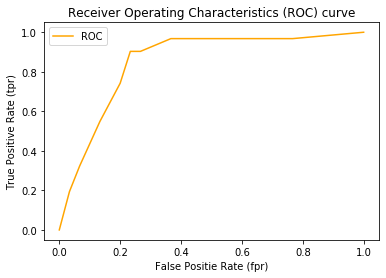

In [138]:
# Create a funcrtion for plotting ROC curves
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fpr, tpr):
    
    '''
    plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    # plot roc curve
    plt.plot(fpr,tpr,color='orange',label='ROC')
    
    # plot line with no predictive power (baseline)
#     plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='Guessing')
    
    # customize the plot
    plt.xlabel('False Positie Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [139]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8516129032258064

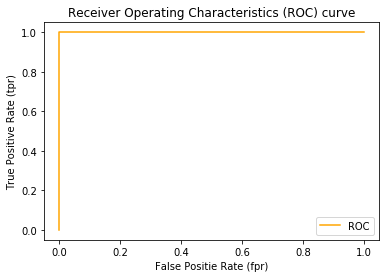

In [140]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [141]:
fpr

array([0., 0., 1.])

In [142]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusin matrix is a quick way to compare the labels a model predicts and the actual labels it was suppoused to predict.

In essence, giving you an idea of where the model is getting confused

In [143]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  7],
       [ 3, 28]], dtype=int64)

In [144]:
# Visualize confusion matrix with pd.crosstab() => for comparing 

pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Label'])

Predicted Label,0,1
Actual Label,,
0,23,7
1,3,28


In [145]:
# how to install package within jupyter notebook within current enviroment
import sys
!conda install --yes --prefix {sys.prefix} seaborn 
# prefix is path name

Solving environment: ...working... done

# All requested packages already installed.



In [225]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font_scale
sns.set(font_scale=1.5)

# Create a confusion matix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot using Seaborn
sns.heatmap(conf_mat);

ValueError: Found input variables with inconsistent numbers of samples: [190, 45]

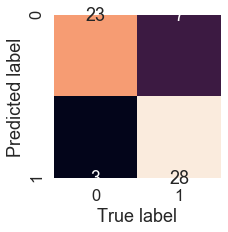

In [147]:
def plot_conf_map(conf_mat):
    '''
    Plots a confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False
                    )
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    
plot_conf_map(conf_mat)

<img src='confusion_matrix.PNG'>

**Classification Report**

It is collection of different evaluation matrix rather than the single one that where the report comes from

In [148]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



* precision : indicates proportion of positive indentification (a model predicated 1) which were actually correct. A model which produces no false positives has precision of 1.0

* recall : indicates proportion of positives which were correctly classified. A model which produces no false negatives has recall of 1.0

* f1 : combination of precision & recall.A perfect model achieves an F1 score of 1.0

* support : the number of samples each metrics was calculated on (total samples of 0 -> 29, total samples of 1 -> 32)

* Accuracy : Its in decimal. Perfect accuracy is 1.0

* Macro avg : short for macro average, the average precision, recall and F1 score between classes. if you have class imbalances (29, 32), pay attention to this metrics

* Weighted avg : Short for weighted average, its average, precision, recall anf F1 score between classes. Weighted means  each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class( e.g. will give a high value when one class out performs another due to having more samples)

In [149]:
pd.DataFrame(classification_report(y_test,
                                   y_preds,
                                   output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.884615,0.800000,0.836066,0.842308,0.841614
recall,0.766667,0.903226,0.836066,0.834946,0.836066
f1-score,0.821429,0.848485,0.836066,0.834957,0.835178
support,30.000000,31.000000,0.836066,61.000000,61.000000


`Accuracy` : Accuracy is calculated as the total number of correct predictions divided by total number of dataset

In [150]:
# total number of correct predictions
correct_preds = 23+26 # from confusion matrix
accuracy = correct_preds / len(y_preds)
accuracy

0.8032786885245902

Class Imbalance

What if there is imbalance data suppose out of 100 samples ,99 is samples are giving 1 and remaining 1 is giving 0 (consider binary classification). Therefore the model is trained on samples which are giving 1 as output, it is really hard to find a pattern in case 0, because there is only 1 sample which gives 0.

In [151]:
# Where precision and recall become valuable

disease_true = np.zeros(1000)
disease_true[0] = 1 # there is only one +ve case

disease_preds = np.zeros(1000) # model predicts every case as 0

print(classification_report(disease_true,disease_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



C:\Users\prash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


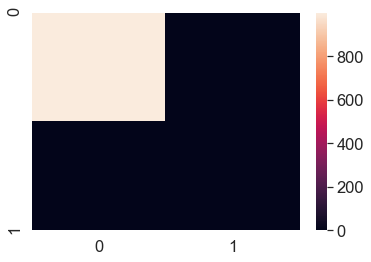

In [152]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font_scale
sns.set(font_scale=1.5)

# Create a confusion matix
conf_mat = confusion_matrix(disease_true,disease_preds)

# Plot using Seaborn
sns.heatmap(conf_mat);

If your data is imbalanced then see the F1 score, if your data is not imbalanced then judging the model based on accuracy will be sufficient

To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1 )
* **Pricison** and **recall** become more important when classes are imbalanced

* if false positive predictions are worse than false negatives, aim for higher precision

* if false negative predictions are worse than false positives, aim for higher recall

* **F1-score** is a combinatio of precision and recall

### 4.2.2 Regression model evaluation metrics

1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean sqaured error (MSE)

**R^2**

what R-squared does: Compares your models predictions to the mean of the targets. Values can range from -1 (very poor model) to 1

In [153]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Set up a random seed
np.random.seed(42)

# Create x & y
x = boston_df.drop('target',axis=1)
y = boston_df['target']

# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate the model
model = RandomForestRegressor()

# Fit the data to model 
model.fit(x_train,y_train)

# Evaluate the model on test data
model.score(x_test,y_test) # by default calculates R^2 

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8477414419760558

In [154]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean

# np.full() Return a new array of given shape and type
y_test_mean = np.full(len(y_test), np.mean(y_test))

In [155]:
y_test_mean[:5]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [156]:
np.mean(y_test)

21.488235294117654

In [157]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [158]:
r2_score(y_test,y_test) # if we predict y_test values perfectly it R^2 value would be 1

1.0

`r2_score` - it gives us a quick insight into how closely our model's predictions are to perfect predictions. 

In [159]:
np.std([2.0,1.5,2.5,3.5,3.0,4.0,4.5])

1.0

In [160]:
np.std([1,2,3,5,6,8,10])

3.0237157840738176

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differnces between predictions and actual values. It gives you an idea of how wrong your models predictions are.
(absolute means turn -ve values into +ve)

In [161]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.2037254901960788

In [162]:
df = pd.DataFrame(data={'actual values': y_test,
                        'predicted values': y_preds})
df['difference'] = df['predicted values'] - df['actual values']


In [163]:
np.average(abs(df['difference']))

2.2037254901960788

So basically what this is saying is that on an average every prediction our model makes is going to be on average plus or minus 2.12 away from the actual value.

**Mean Sqaured Error (MSE)**

In [164]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_preds)
mse

11.165696078431376

In [165]:
np.average(np.square(df['difference']))

11.165696078431376

Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors.
`This means RMSE or MSE should be more useful when large errors are particularly undesirable.`

The three tables below show examples where MAE is steady and RMSE increases as the variance associated with the frequency distribution of error magnitudes also increases.

<img src='errors.png'>

### Summarizing Machine Learning Model Evaluation

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

**Classification Model Evaluation Metrics/Techniques**

* `Accuracy` - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* `Precision` - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* `Recall` - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

* `F1 score` - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* `Confusion matrix` - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

* `Cross-validation` - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

* `Classification report` - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

* `ROC Curve` - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

* `Area Under Curve (AUC) Score` - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

**Which classification metric should you use?**

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* **Precision** and **recall** become more important when classes are imbalanced.

* If false-positive predictions are worse than false-negatives, aim for higher precision.

* If false-negative predictions are worse than false-positives, aim for higher recall.

* **F1-score** is a combination of precision and recall.

* A confusion matrix is always a good way to visualize how a classification model is going.

**Regression Model Evaluation Metrics/Techniques**

* **R^2 (pronounced r-squared) or the coefficient of determination** - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

* **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

* **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

**Which regression metric should you use?**

* **R2** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your **R2** value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* **MAE** gives a better indication of how far off each of your model's predictions are on average.

* As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

*  Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

*  Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

### 4.2.3 `scoring` parameter

In [166]:
# Imports
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Set up a random seed
np.random.seed(42)

# Create a data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate the model
model = RandomForestClassifier()

# Fit the model to data
model.fit(x_train,y_train)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [167]:
# Evaluating a model on test data
model.score(x_test,y_test)

0.8524590163934426

In [168]:
# Cross validation check
np.random.seed(42)
cv_acc = cross_val_score(model,x,y,scoring=None)
cv_acc

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.76237624, 0.84158416, 0.77227723])

In [169]:
# Cross-validated accuracy
print(f'The cross validated accuacy is : {np.mean(cv_acc)*100:.2f}%')

The cross validated accuacy is : 79.21%


In [170]:
np.random.seed(42)
cv_acc = cross_val_score(model,x,y,scoring='accuracy')
print(f'The cross validated accuacy is : {np.mean(cv_acc)*100:.2f}%')

The cross validated accuacy is : 79.21%


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [171]:
# precision
cv_precision = cross_val_score(model,x,y,scoring='precision')
np.mean(cv_precision)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7945726840642094

In [172]:
# recall
cv_recall = cross_val_score(model,x,y,scoring='recall')
np.mean(cv_recall)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7515151515151515

For Regression model

In [173]:
# Imports
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Set up a random seed
np.random.seed(42)

# Create x & y
x = boston_df.drop('target',axis=1)
y = boston_df['target']

# Split into train & test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# Instiate the model
model = RandomForestRegressor()

# Fit the model to data
model.fit(x_train,y_train)

# Evaluate the model on test data
model.score(x_test,y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8477414419760558

In [174]:
# cross-validation
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,scoring=None)
np.mean(cv_r2)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.49288017024906794

In [175]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,scoring='r2')
cv_r2

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.73333449, 0.52719664, 0.21810938])

In [176]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model,x,y,scoring='neg_mean_absolute_error')
cv_mae

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([-2.67881657, -4.08798817, -4.75154762])

In [177]:
# Mean squared error
cv_mse = cross_val_score(model,x,y,scoring='neg_mean_squared_error')
cv_mse

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([-11.6380858 , -36.54771953, -52.52275119])

In [178]:
np.mean(cv_mse)

-33.56951883863999

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier()

model.fit(x_train,y_train)

# Make some predictions
y_preds = model.predict(x_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy : {accuracy_score(y_test,y_preds)*100:.2f}')
print(f'Precision : {precision_score(y_test,y_preds)*100:.2f}')
print(f'Recall : {recall_score(y_test,y_preds)*100:.2f}')
print(f'F1: {f1_score(y_test,y_preds)*100:.2f}')

Classifier metrics on the test set
Accuracy : 85.25
Precision : 89.66
Recall : 81.25
F1: 85.25


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


For Regression model

In [180]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Set up a random seed
np.random.seed(42)

# Create x & y
x = boston_df.drop('target',axis=1)
y = boston_df['target']

# Split into train & test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


# Instiate the model
model = RandomForestRegressor()

# Fit the model to data
model.fit(x_train,y_train)

y_preds = model.predict(x_test)

# Evaluate the model
print(f'R2 score : {r2_score(y_test,y_preds)*100:.2f}')
print(f'Mean absolute error : {mean_absolute_error(y_test,y_preds)}')
print(f'Mean Squared error  : {mean_squared_error(y_test,y_preds)}')

R2 score : 84.77
Mean absolute error : 2.2037254901960788
Mean Squared error  : 11.165696078431376


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 5. Improving a model

First prediction = baseline prediction
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? 
 
From a model perspective:
* Is there a better model we could use?
* could we improve a current model?

**Parameters vs Hyperparameters**
* Parameters - model find these patterns in data
* Hyperparameters - Setting on a model you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust Hyperparameters**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [181]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()


In [182]:
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

<img src='hyperparameters.png'>

Lets make 3 sets, training, validation and test 

In [183]:
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**We're going to try and adjust:**

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [184]:
def evaluate_preds(y_true, y_preds):
    '''
    performs comparison on y_true labels vs. y_pred labels
    on a classification model
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {'accuracy': round(accuracy,2),
                   'precision': round(precision,2),
                   'recall': round(recall,2),
                   'f1': round(f1,2)
                  }
    print(f'Accuracy : {accuracy*100:.2f}%')
    print(f'Precision : {precision*100:.2f}%')
    print(f'Recall : {recall:.2f}')
    print(f'F1 : {f1:.2f}')
    
    return metric_dict

In [185]:
from sklearn.ensemble import RandomForestClassifier

# Set up a random seed
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Create x & y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the length of our data
validation_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:validation_split], y[train_split:validation_split]
x_test, y_test = x[validation_split:], y[validation_split:]

# Instantiate model
model = RandomForestClassifier()

# Fit the model to training data
model.fit(x_train,y_train)

# Make baseline predictions
y_preds = model.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metric = evaluate_preds(y_valid,y_preds)
baseline_metric

Accuracy : 80.00%
Precision : 76.67%
Recall : 0.92
F1 : 0.84


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [186]:
len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [187]:
# Setup a random seed
np.random.seed(42)

# Create a second classifier with different hyperparameter
model_2 = RandomForestClassifier(n_estimators=100)

# Fit the model to training data
model_2.fit(x_train,y_train)

# Make baseline predictions
y_preds = model.predict(x_valid)

# Evaluate the classifier on validation set
model_2_metric = evaluate_preds(y_valid,y_preds)
model_2_metric

Accuracy : 80.00%
Precision : 76.67%
Recall : 0.92
F1 : 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [188]:
# Setup a random seed
np.random.seed(42)

# Create a second classifier with different hyperparameter
model_3 = RandomForestClassifier(n_estimators=100,max_depth=10)

# Fit the model to training data
model_3.fit(x_train,y_train)

# Make baseline predictions
y_preds = model.predict(x_valid)

# Evaluate the classifier on validation set
model_3_metric = evaluate_preds(y_valid,y_preds)
model_3_metric

Accuracy : 80.00%
Precision : 76.67%
Recall : 0.92
F1 : 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

### 5.2  Hyperparameter tuning with RandomizedSearchCV (Randomized Search Cross Validation)

In [189]:
# Import
from sklearn.model_selection import RandomizedSearchCV

hyper_dict = {'n_estimators':[10,100,200,500,1000,1200],
              'max_depth': [None, 5, 10, 20, 30],
              'max_features':['auto','sqrt'],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,4]
             }

# Setup a random seed
np.random.seed(42)

# Create x & y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate RandomForestClassifier
model = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV (it will automatically make validation set for us)
rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=hyper_dict,
                              n_iter=5, # no of models to try
                              verbose=2
                             ) 

# Fit the RandomizedSearchCV version of model 
rs_model.fit(x_train,y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.0s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=500, min_samples_split=4

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.2s finished
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [190]:
rs_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [191]:
rs_y_preds = rs_model.predict(x_test)
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy : 78.69%
Precision : 72.73%
Recall : 0.86
F1 : 0.79


### 5.3 Hyperparameter tuning with GridSearchCV

In [192]:
hyper_dict

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

GridSearchCV will go through every single combination that is availabel

In [193]:
6*5*2*3*3

540

In [194]:
# and cross validated
6*5*2*3*3*5

2700

In [195]:
# reducing the number of hyperparameters -> less combinations -> less models to train
hyper_dict_2 =  {'n_estimators': [100, 200, 500],
                 'max_depth': [None, 5, 10],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_split': [6],
                 'min_samples_leaf': [1, 2]}

In [196]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Setup a random seed
np.random.seed(42)

# Create x & y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate RandomForestClassifier
model = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV (it will automatically make validation set for us)
gs_model = GridSearchCV(estimator=model,
                              param_grid=hyper_dict_2,
                              verbose=2
                             ) 

# Fit the RandomizedSearchCV version of model 
gs_model.fit(x_train,y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_le

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   38.9s finished


In [197]:
rs_y_preds = rs_model.predict(x_test)
gs_metric = evaluate_preds(y_test,rs_y_preds)

Accuracy : 78.69%
Precision : 72.73%
Recall : 0.86
F1 : 0.79


Let's compare our different models metrics

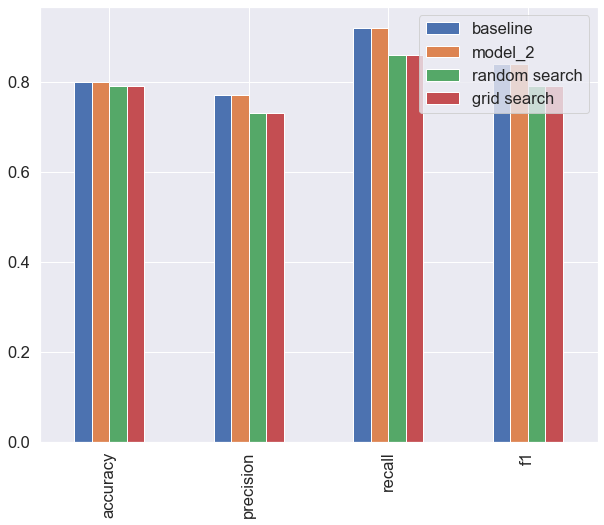

In [198]:
compare_metrics = pd.DataFrame({'baseline':baseline_metric,
                                 'model_2':model_2_metric,
                                 'random search':rs_metrics,
                                  'grid search':gs_metric})
compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and trained machine learning model

two ways to save and load machine learning models
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [199]:
import pickle

# save an existing model to file
pickle.dump(gs_model, open('gs_model.pkl','wb'))

In [200]:
# load saved model
loaded_gs_model = pickle.load(open('gs_model.pkl','rb'))

In [201]:
# Make some predictions
pickle_y_preds = loaded_gs_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy : 81.97%
Precision : 77.42%
Recall : 0.86
F1 : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

if your model is large it may be more effiecient to use joblib over pickle

In [202]:
from joblib import dump, load

# Save model to file
dump(gs_model,filename='gs_model.joblib')

['gs_model.joblib']

In [203]:
# import a saved joblib model
loaded_joblib_model = load(filename='gs_model.joblib')

In [204]:
# Make some predictions
joblib_y_preds = loaded_gs_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

Accuracy : 81.97%
Precision : 77.42%
Recall : 0.86
F1 : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together

In [205]:
car_sales = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [206]:
len(car_sales)

1000

In [207]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [208]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

<img src='thingsToRemember.PNG'>

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build the model to data

In [217]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup a random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels (missing price values)
car_sales = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipelines
categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
     ( 'onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature=['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))
])


numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])

# Setup preprocessing step(fill missing values then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat',categorical_transformer,categorical_features),
                        ('door',door_transformer,door_feature),
                        ('numeric',numeric_transformer,numeric_features)
                    ])

# creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor',preprocessor),
                        ('model', RandomForestRegressor())])

# Create x & y data
x = car_sales.drop('Price',axis=1)
y = car_sales['Price']

# Split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Fit the model to data
model.fit(x_train,y_train)

# Evaluating model on test data
model.score(x_test,y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1821575815702311

In [210]:
# # Fill categorical values with 'missing' and numericals values with mean 
# if the strategy is constant you have to pass fill_value
# this is saying over the categorical columns constantly fill them, if you find the missing value fill them with 'missing'
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
categorical_features = ['Make','Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('categorical_imputer',categorical_imputer,categorical_features),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_feature)
])

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [212]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


Practice

In [221]:
# Standard imports
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Set up a random seed
np.random.seed(42)

# Import data and delete missing labels
car_sales = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales.dropna(subset=['Price'],inplace=True)

# Define different features and transformers
cat_features =['Make','Colour']
cat_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                                  ('onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value=4))])

odometer_feature = ['Odometer (KM)'] 
odometer_tranformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])

# Setup preprocessing steps (filling missing values and convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ('cat',categorical_transformer,cat_features),
    ('door',door_transformer,door_feature),
    ('num',odometer_tranformer,odometer_feature)
])

# Creating a preprocessing and modelling a pipeline
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
])

# Create x & y
x = car_sales.drop('Price',axis=1)
y = car_sales['Price']

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Fit the model to data
model.fit(x_train,y_train)

# Evaluate the model on test data
model.score(x_test,y_test)

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1821575815702311

It's also possible to use `GridSearchCV` or `RandomizedSearchedCV` with our `Pipeline`

In [223]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features':['auto'],
    'model__min_samples_split':[2,4]
}

gs_model = GridSearchCV(estimator=model,
                        param_grid=pipe_grid,
                        verbose=2)

gs_model.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=5, model__max_features=auto, model__min

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   55.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
               

In [224]:
gs_model.score(x_test,y_test)

0.3364391041151098